In [39]:
!pip install pmdarima

In [40]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import YearLocator
from pmdarima import auto_arima

In [41]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


***Du doan cho bo tinh Da Nang***

In [42]:
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_DaNang_Updated.csv')
# df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()
df = df.reset_index()

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979 entries, 0 to 1978
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   level_0   1979 non-null   int64         
 1   index     1979 non-null   int64         
 2   date      1979 non-null   datetime64[ns]
 3   pm25      1979 non-null   float64       
 4   pm10      1979 non-null   float64       
 5   o3        1979 non-null   float64       
 6   no2       1979 non-null   float64       
 7   so2       1979 non-null   float64       
 8   co        1979 non-null   float64       
 9   AQI_pm25  1979 non-null   float64       
 10  AQI_pm10  1979 non-null   float64       
 11  AQI_o3    1979 non-null   float64       
 12  AQI_no2   1979 non-null   float64       
 13  AQI_so2   1979 non-null   float64       
 14  AQI_co    1979 non-null   float64       
 15  AQI       1979 non-null   float64       
dtypes: datetime64[ns](1), float64(13), int64(2)
memory usage: 24

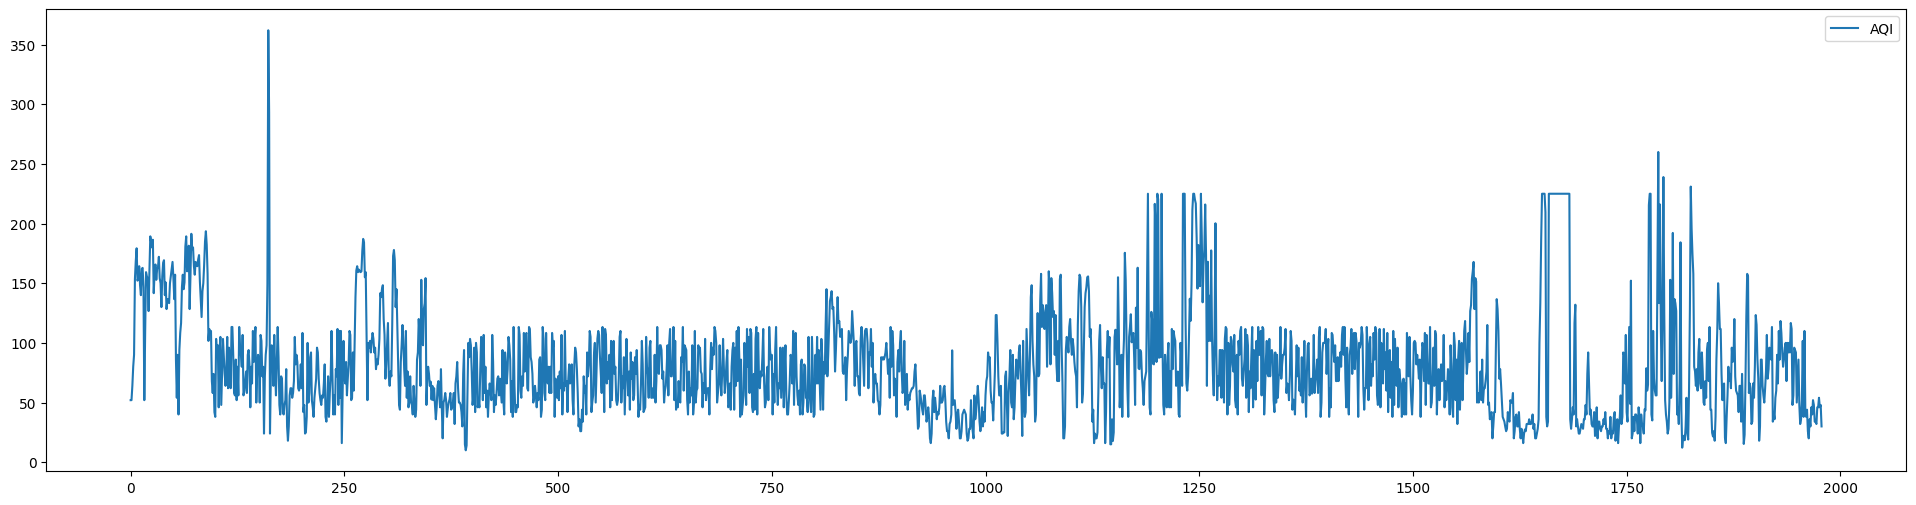

In [43]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

**Chia du lieu thanh 7:2:1**

In [44]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [45]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=13615.557, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=13401.753, Time=0.43 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=13285.943, Time=0.77 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=13274.706, Time=1.26 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=13276.495, Time=2.36 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=13272.307, Time=3.60 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=13518.965, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=13271.977, Time=1.81 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=13272.834, Time=3.04 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=13273.160, Time=5.62 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=13278.699, Time=3.55 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=13429.331, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=13273.031, Time=2.07 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=13275.839, Time=4.03 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=13276.456, Time=6.75

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [46]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]


In [47]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 57.96%
MAE: 36.12
RMSE: 52.04


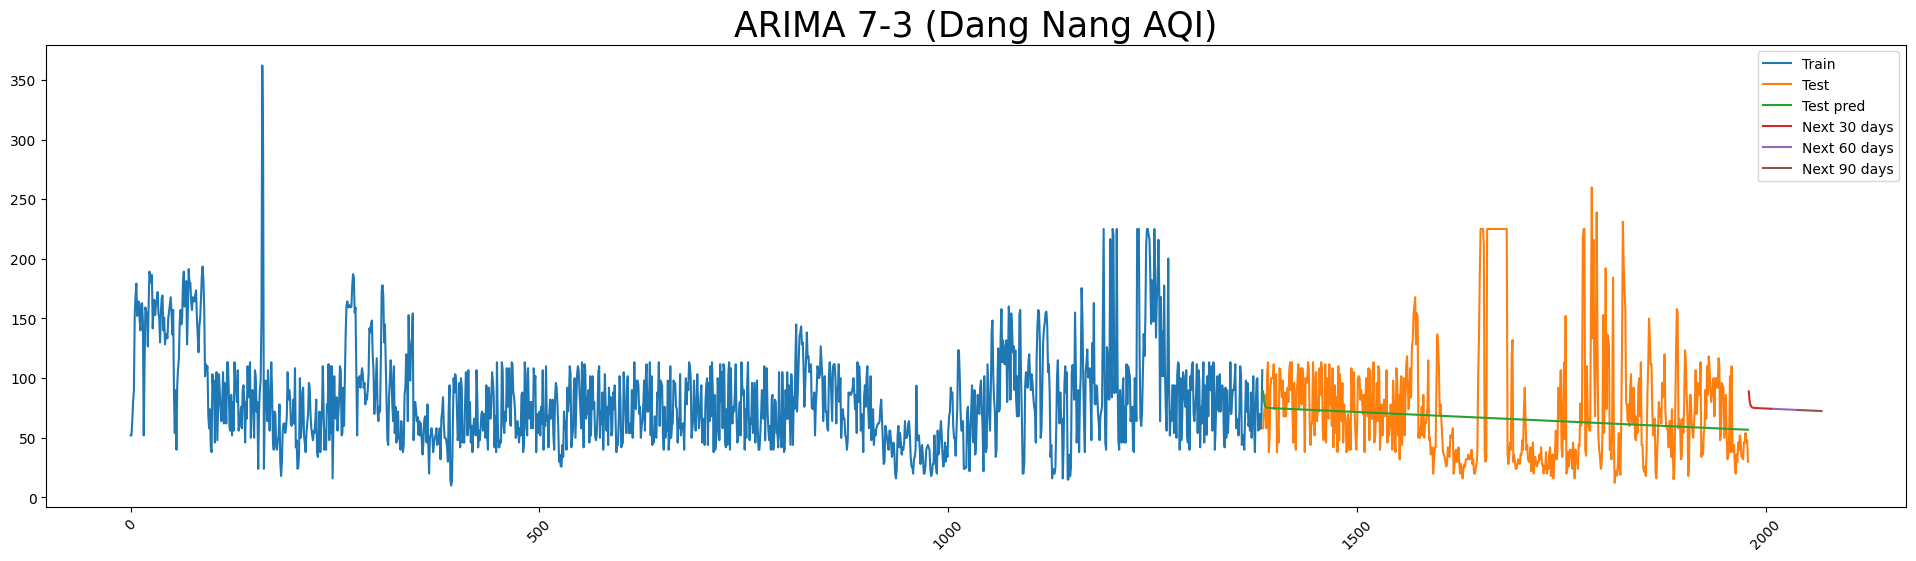

In [48]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])



plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Dang Nang AQI)', fontsize=25)
plt.show()

****Chia lai data thanh 8:1:1****

In [49]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8*len(df))

train_data = df[:train_size]
test_data = df[train_size:]


In [50]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=15562.438, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=15272.919, Time=0.46 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=15158.410, Time=0.59 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=15148.205, Time=2.16 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=15148.911, Time=2.72 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=15142.565, Time=1.93 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=15426.867, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=15142.358, Time=1.18 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=15144.298, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=15142.942, Time=2.65 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=15140.469, Time=3.89 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=15322.190, Time=0.22 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=15144.313, Time=1.06 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=15146.088, Time=1.70 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=15142.291, Time=6.91

ARIMA(order=(1, 1, 4), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [51]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]


In [52]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 88.03%
MAE: 45.17
RMSE: 59.32


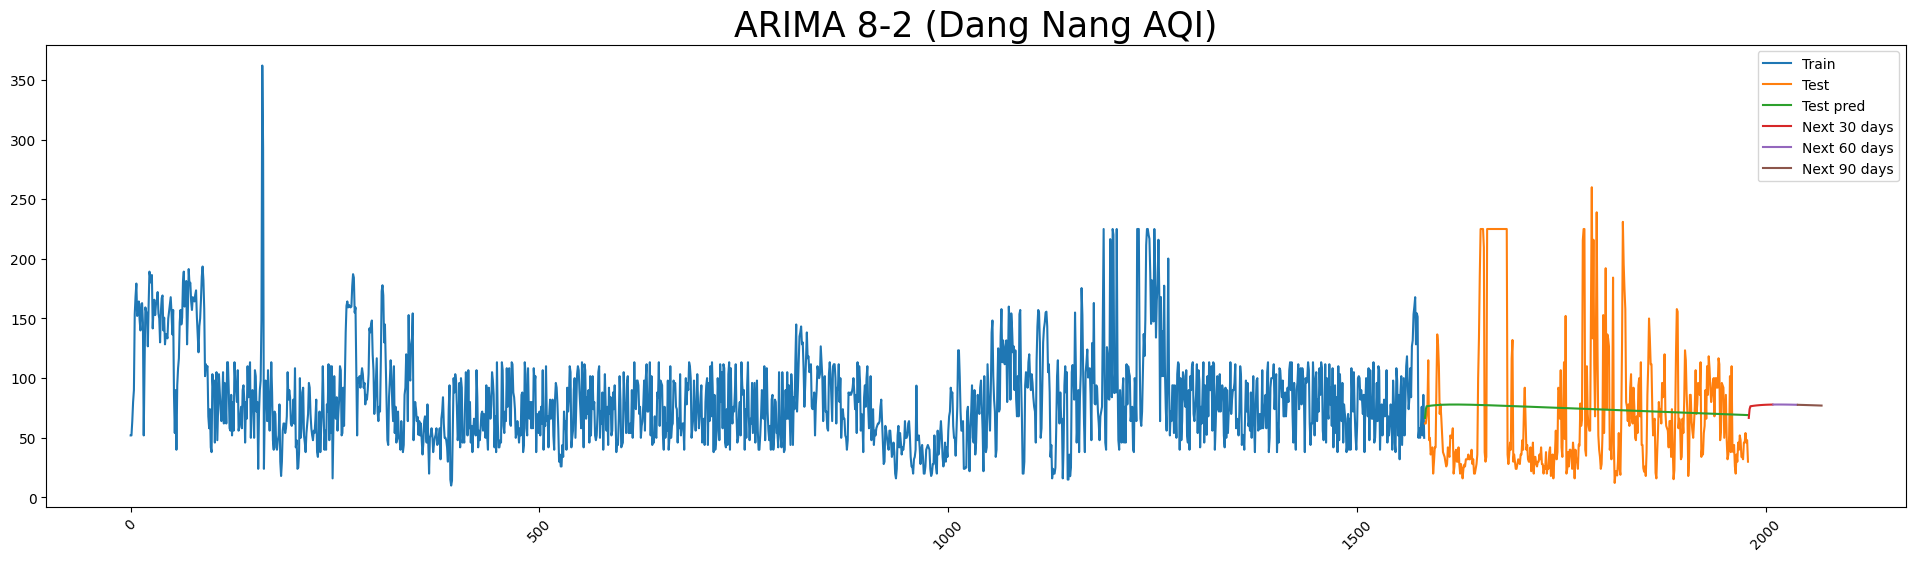

In [53]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Dang Nang AQI)', fontsize=25)

plt.show()

**Chia lai du lieu thanh 9:1**


In [54]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [55]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=17550.036, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=17324.162, Time=1.15 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=17209.870, Time=1.33 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=17192.102, Time=1.32 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=17193.443, Time=1.00 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=17189.387, Time=2.12 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=17428.639, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=17187.857, Time=0.79 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=17189.459, Time=1.18 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=17191.366, Time=2.38 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=17193.292, Time=5.16 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=17344.204, Time=0.46 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=17189.478, Time=2.38 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=17191.435, Time=3.10 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=17193.309, Time=3.11

ARIMA(order=(1, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [56]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [57]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 74.22%
MAE: 34.99
RMSE: 44.37


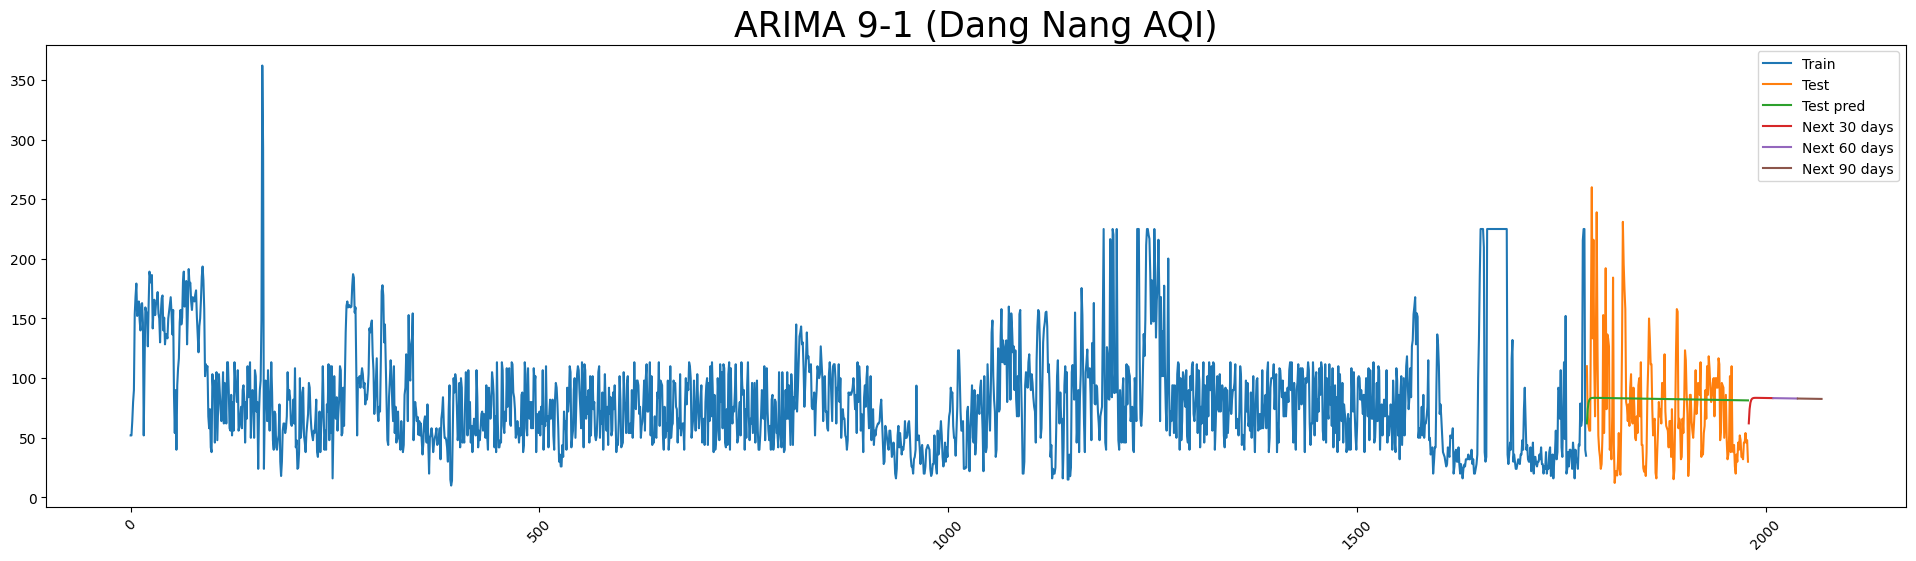

In [58]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Dang Nang AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Ha Noi**

In [59]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_HaNoi_Updated.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(by='date')
df = df.reset_index()


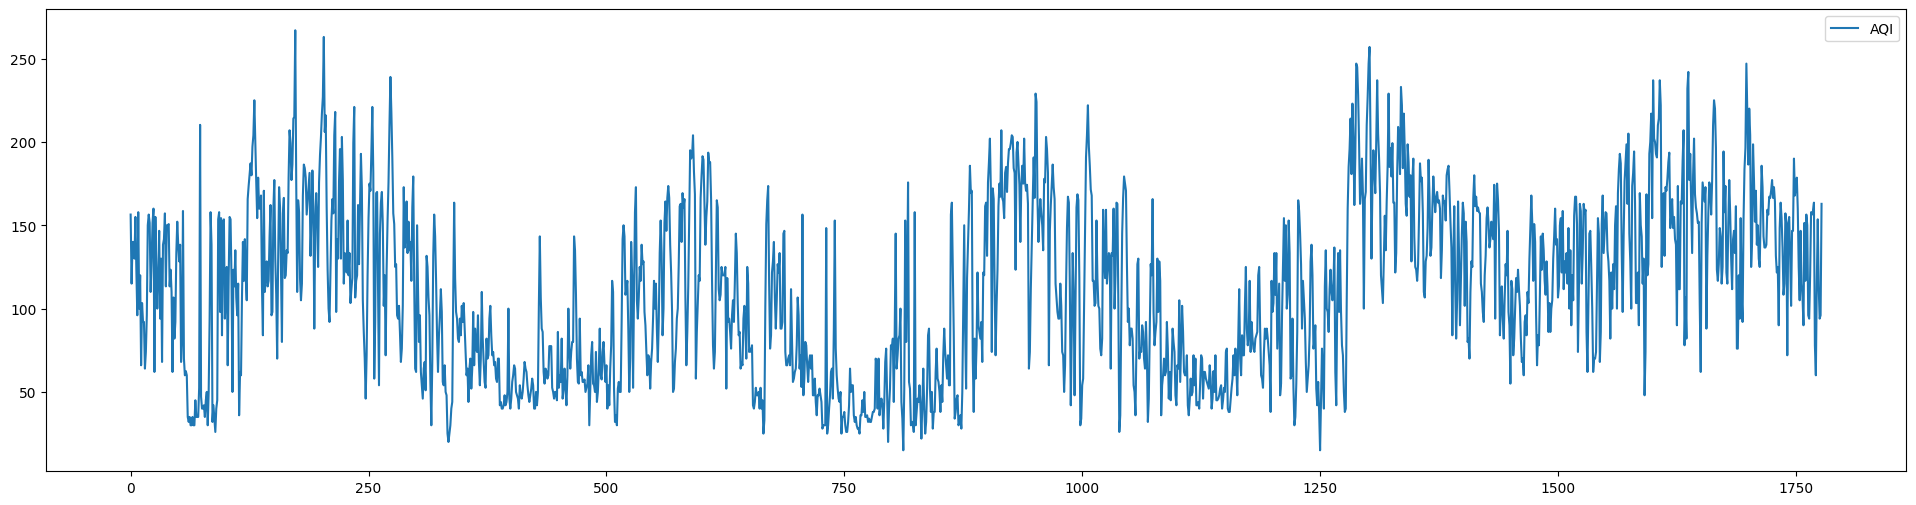

In [60]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu thanh 7:2:1

In [61]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:3
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]



In [62]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=12169.423, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=12131.888, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=12002.829, Time=0.52 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=11964.698, Time=0.72 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=11953.601, Time=1.22 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=11955.471, Time=1.40 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=12149.885, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=11961.246, Time=0.52 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=11951.729, Time=0.87 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=11953.727, Time=1.25 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=11954.946, Time=2.46 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=12096.252, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=11951.921, Time=1.54 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=11953.721, Time=2.68 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=11954.953, Time=2.34

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [63]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [64]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 39.62%
MAE: 58.91
RMSE: 69.16


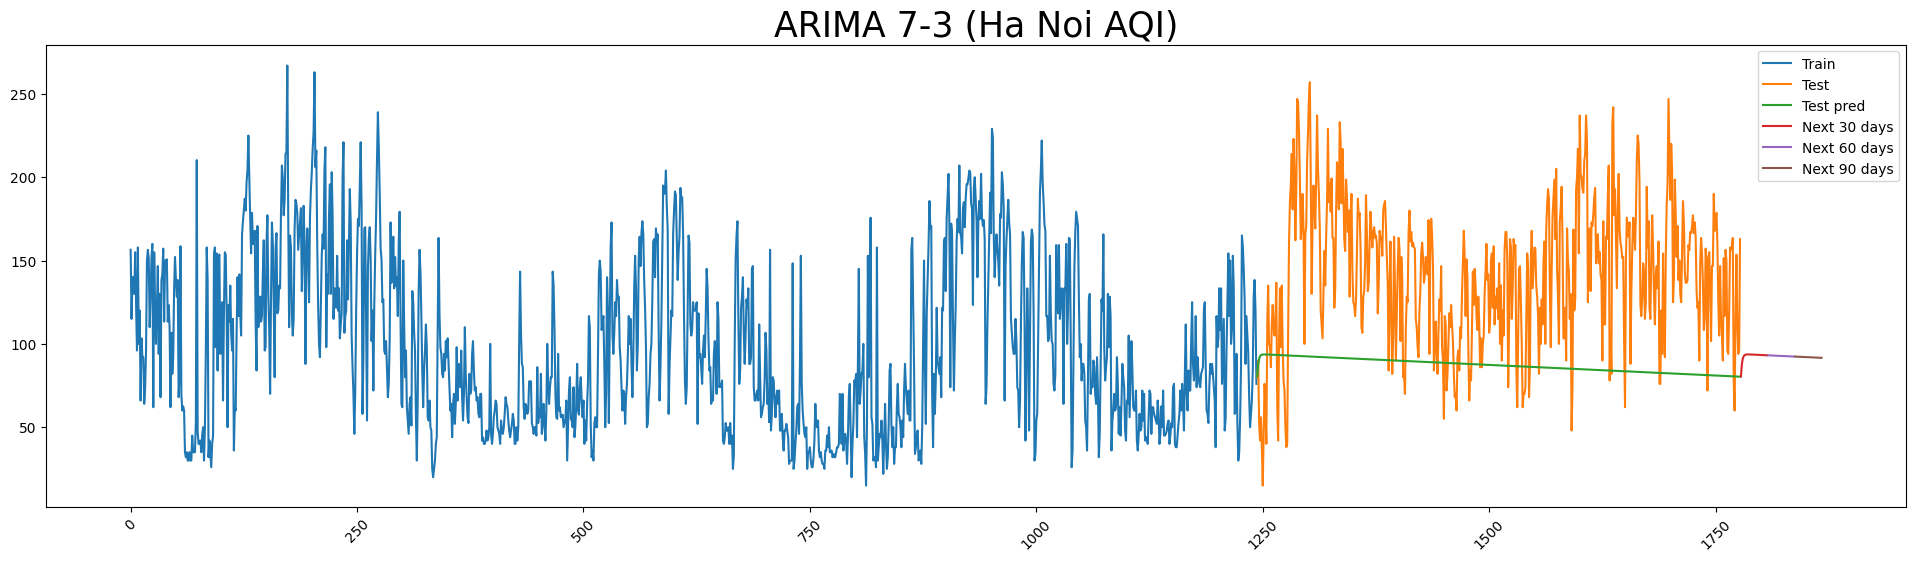

In [65]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))




plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 8:1:1

In [66]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]


In [67]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=13886.528, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=13851.270, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=13708.481, Time=0.48 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=13666.593, Time=0.84 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=13653.734, Time=1.84 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=13654.819, Time=3.04 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=13868.643, Time=0.17 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=13663.761, Time=1.20 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=13649.934, Time=1.91 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=13651.654, Time=1.39 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=13653.024, Time=2.01 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=13801.083, Time=0.20 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=13651.065, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=13651.313, Time=1.56 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=13652.711, Time=2.11

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [68]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [69]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 25.40%
MAE: 31.65
RMSE: 38.67


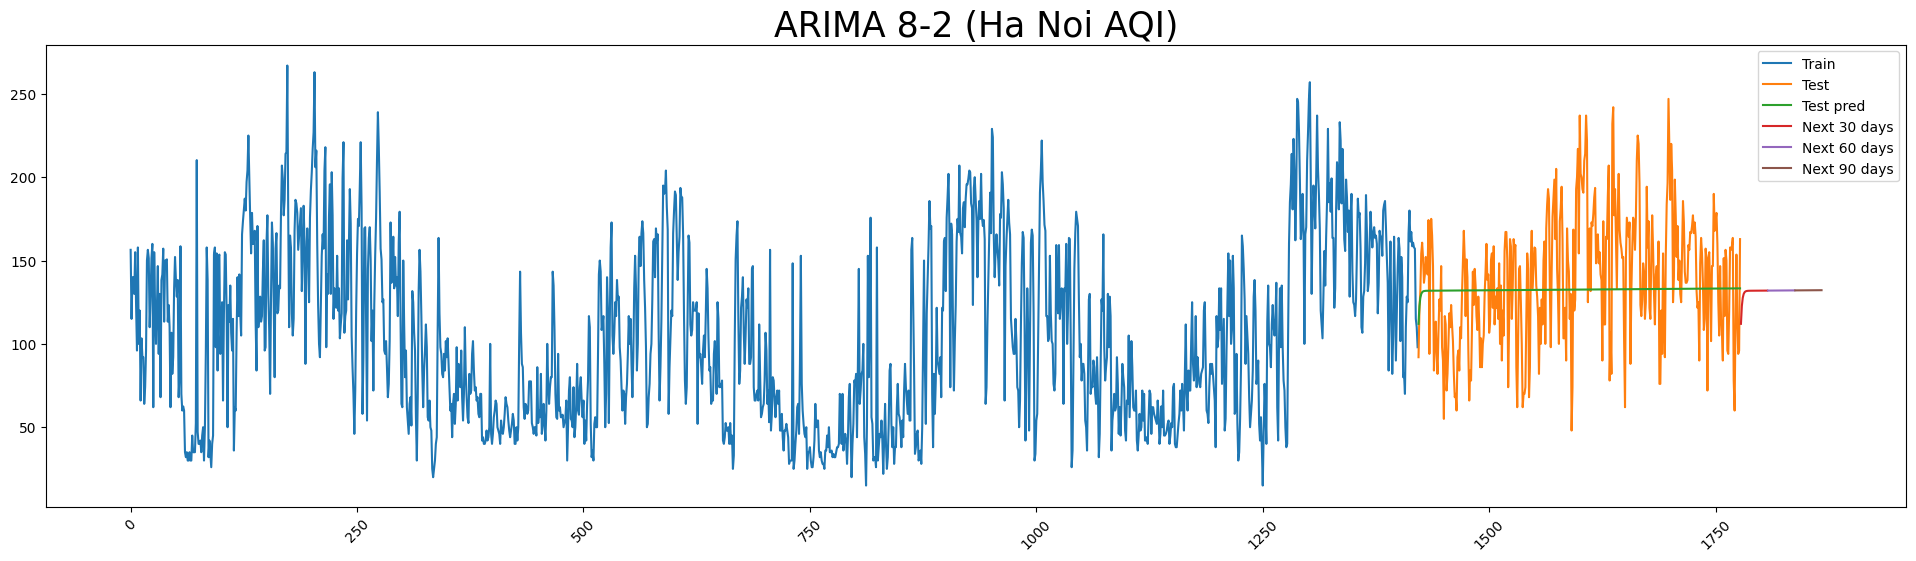

In [70]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Ha Noi AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [71]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))
# test_size = int(0.2 * len(df))
# val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:]
# val_data = df[train_size+test_size:]

In [72]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=15628.286, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=15583.371, Time=0.41 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=15418.739, Time=0.71 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=15367.799, Time=1.69 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=15356.129, Time=2.36 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=15357.267, Time=3.37 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=15605.139, Time=0.18 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=15366.557, Time=1.21 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=15352.182, Time=1.51 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=15354.165, Time=2.94 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=15355.853, Time=2.85 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=15532.193, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=15352.731, Time=1.00 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=15354.154, Time=1.71 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=15355.755, Time=2.33

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [73]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [74]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 22.64%
MAE: 30.16
RMSE: 38.24


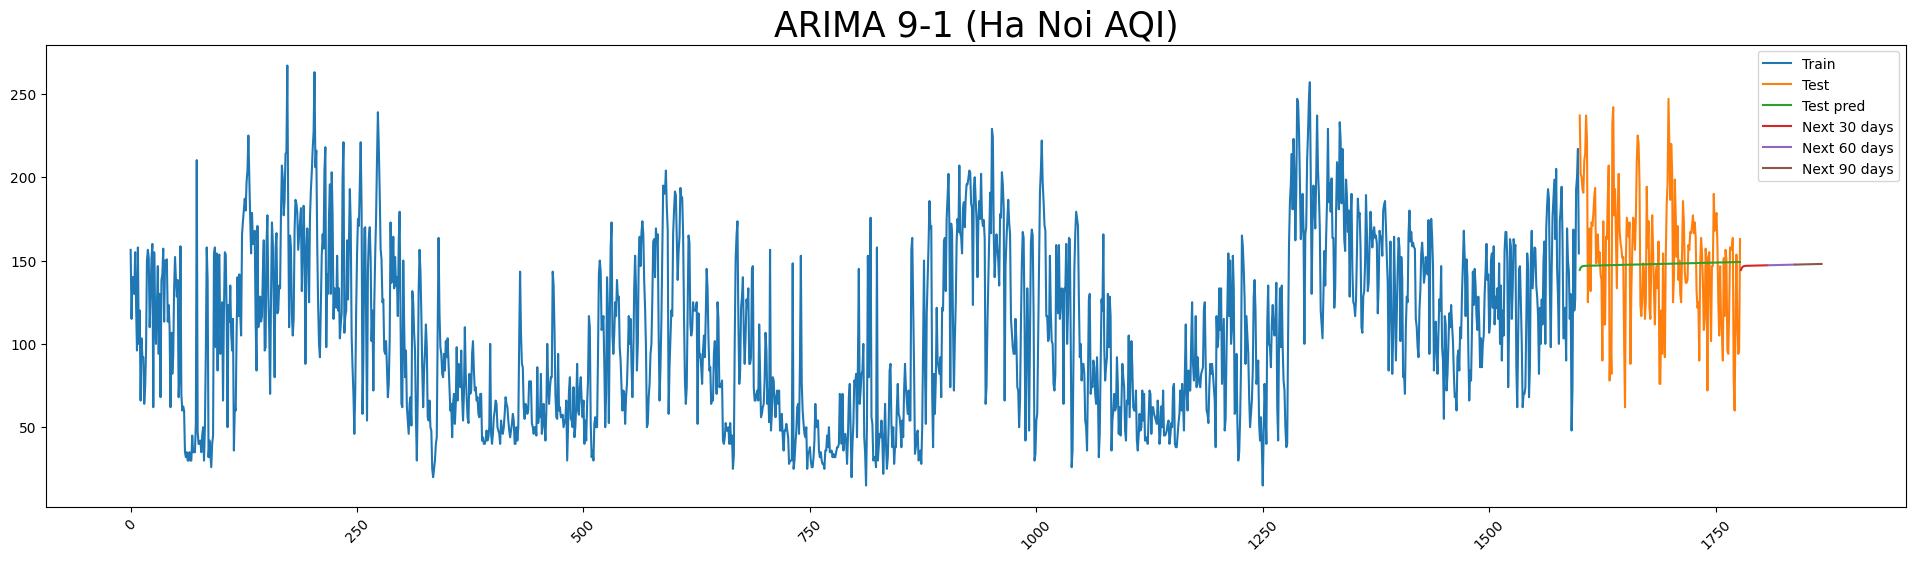

In [75]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Ha Noi AQI)', fontsize=25)

plt.show()

**Du doan cho du lieu Viet Tri**

In [76]:
# Lay du lieu
df = pd.read_csv('/content/drive/My Drive/Dataset_PTDLKD/AQI_VietTri_Updated.csv')
df = df.dropna()
df['date'] = pd.to_datetime(df['date'])
# df = df.sort_values(by='date')
df = df.sort_values(by='date')
df = df.reset_index()


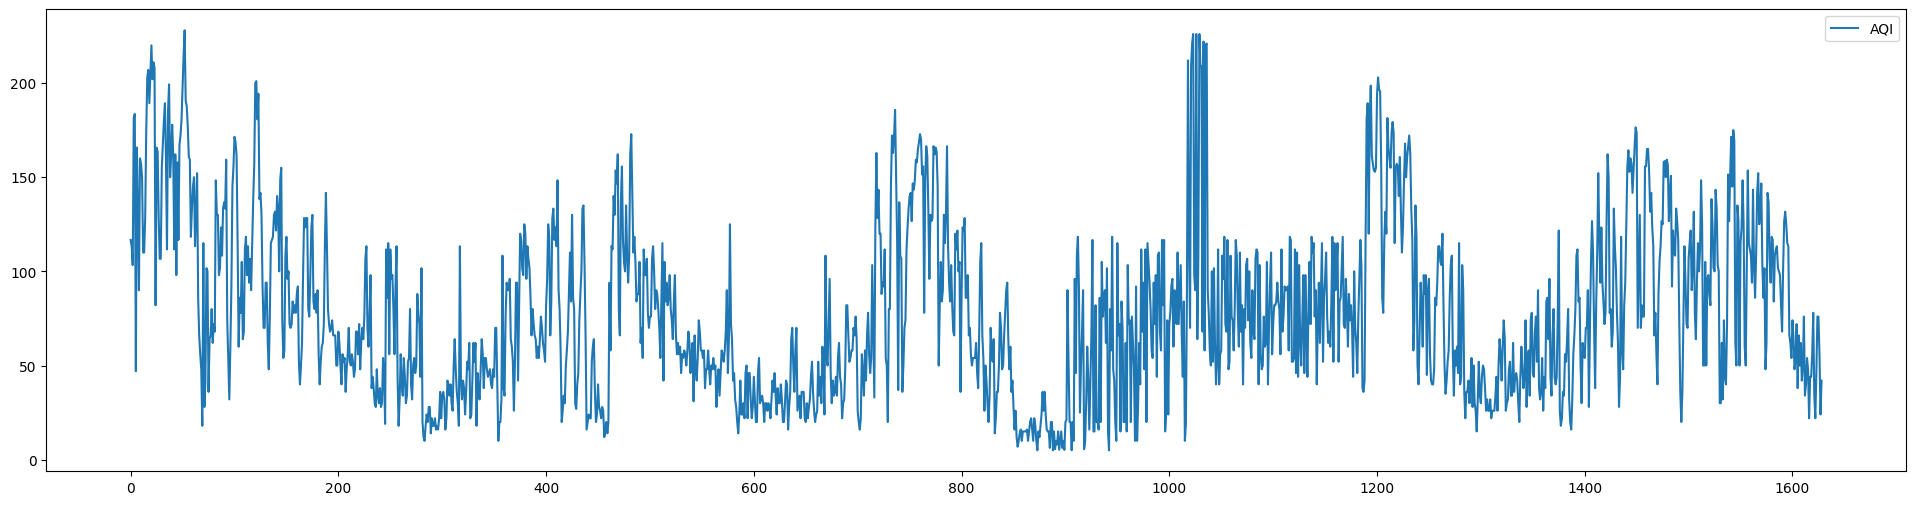

In [77]:
plt.figure(figsize=(24, 6))
plt.plot(df.index, df['AQI'])
plt.legend(['AQI'])
plt.show()

Chia du lieu 7:2:1

In [78]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 7:2:1
train_size = int(0.7 * len(df))


train_data = df[:train_size]
test_data = df[train_size:]



In [79]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=11189.994, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=10949.284, Time=0.29 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=10929.073, Time=0.40 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=10919.582, Time=0.88 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=10918.819, Time=0.97 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=10904.727, Time=1.32 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=11038.418, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=10914.468, Time=0.54 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=10900.727, Time=0.91 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=10902.165, Time=1.66 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=10903.675, Time=2.35 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=10986.373, Time=0.32 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=10905.012, Time=2.04 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=10902.255, Time=3.28 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=10904.274, Time=2.62

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [80]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [81]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 55.33%
MAE: 37.29
RMSE: 45.42


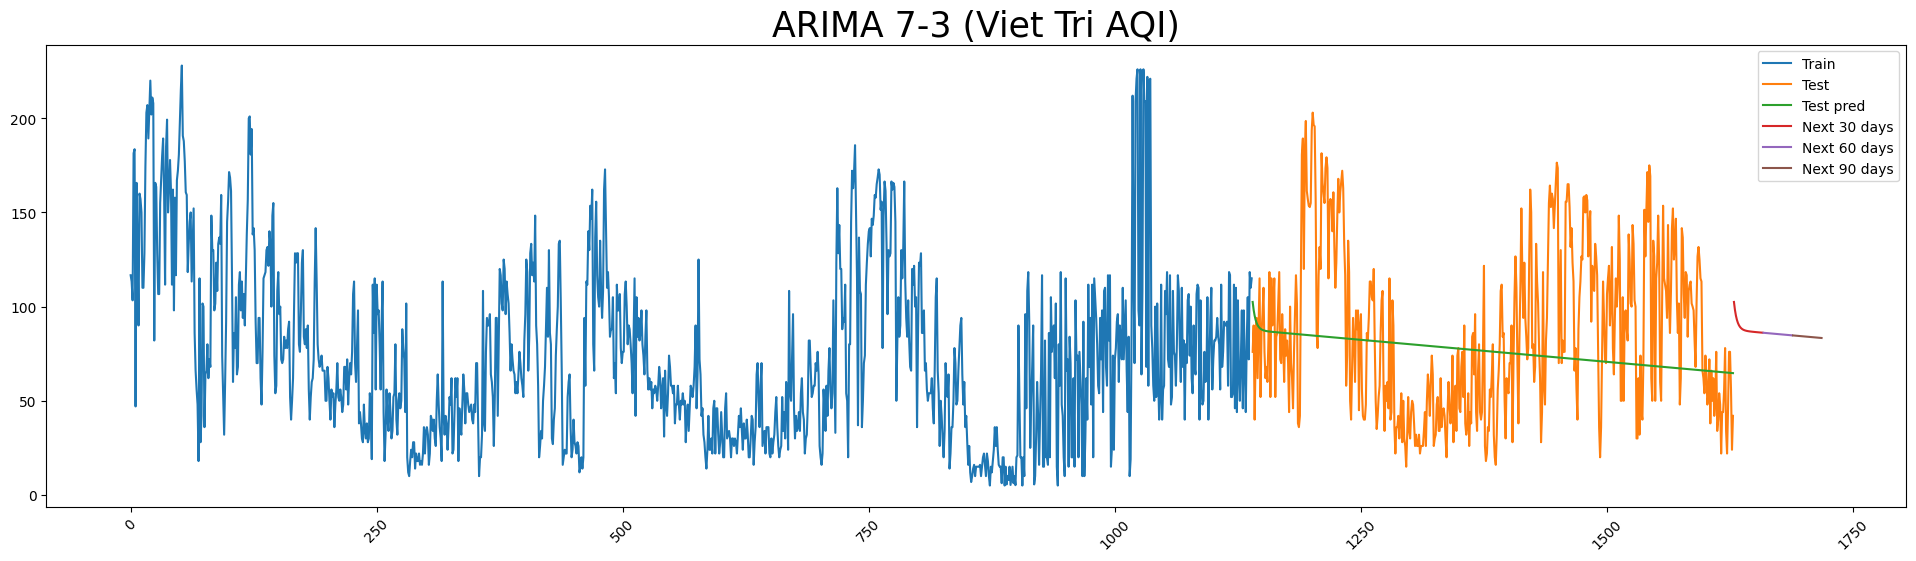

In [82]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 7-3 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu 8:1:1

In [83]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 8:2
train_size = int(0.8 * len(df))



train_data = df[:train_size]
test_data = df[train_size:]



In [84]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=12763.223, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=12513.047, Time=0.67 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=12481.053, Time=1.18 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=12469.947, Time=1.65 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=12469.568, Time=2.33 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=12457.602, Time=1.69 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=12610.291, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=12463.222, Time=0.55 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=12454.589, Time=1.10 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=12455.234, Time=1.85 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=12457.050, Time=2.08 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=12550.939, Time=0.17 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=12457.532, Time=0.92 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=12455.459, Time=2.07 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=12458.544, Time=4.69

ARIMA(order=(4, 1, 1), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [85]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))

# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [86]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 55.20%
MAE: 52.51
RMSE: 65.86


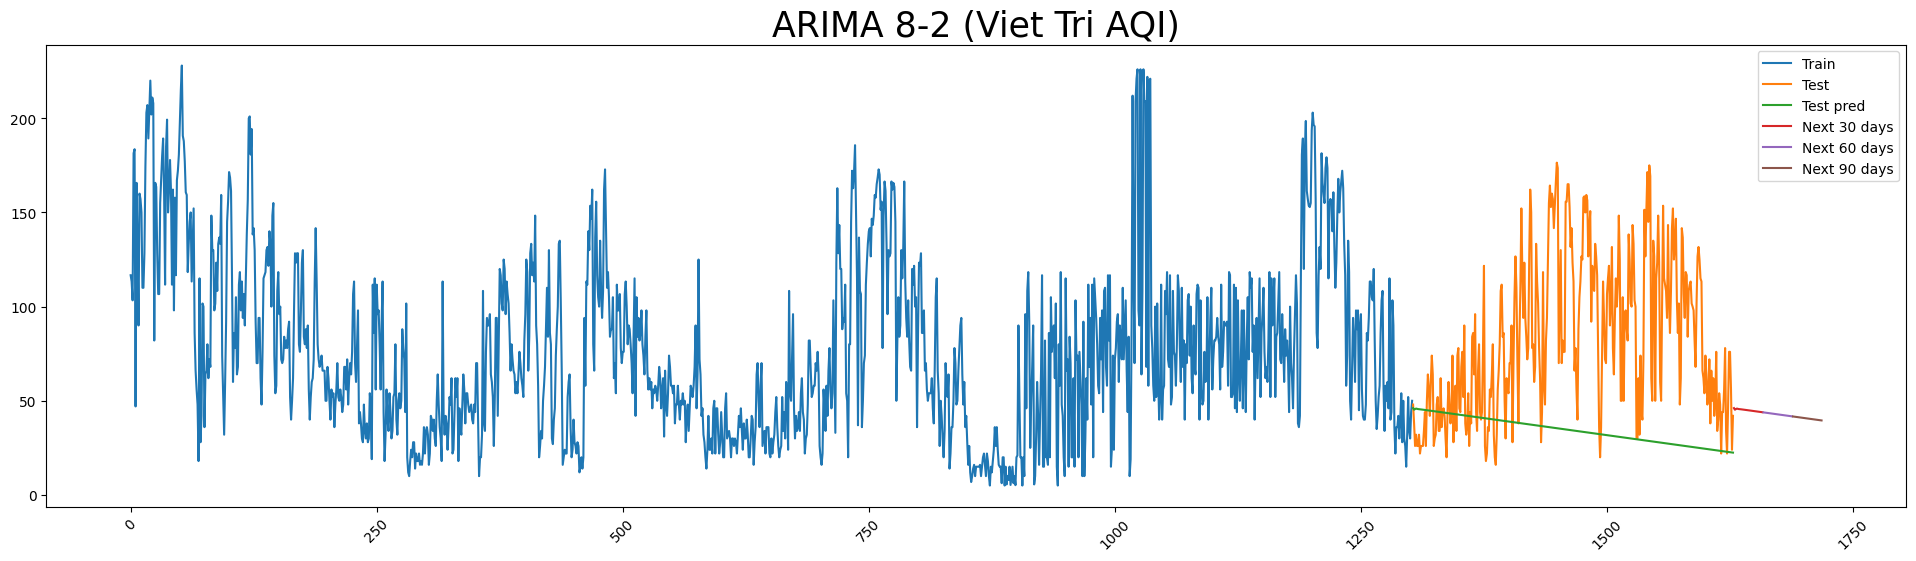

In [87]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 8-2 (Viet Tri AQI)', fontsize=25)

plt.show()

Chia du lieu thanh 6:2:2

In [88]:
# Chia dữ liệu thành tập train, tập test, tập validate theo tỉ lệ 9:1
train_size = int(0.9 * len(df))

train_data = df[:train_size]
test_data = df[train_size:]


In [89]:
model = auto_arima(train_data['AQI'],
                   trace=True,
                   error_action='ignore',
                   suppress_warnings=True,
                   stepwise=False)
model.fit(train_data['AQI'])

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=14314.671, Time=0.05 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=14056.468, Time=0.57 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=14009.797, Time=1.11 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=13995.265, Time=1.40 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=13993.470, Time=2.12 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=13984.540, Time=2.74 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=14160.728, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=13985.491, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=13979.831, Time=1.06 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=13980.051, Time=1.90 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=13981.984, Time=1.99 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=14094.113, Time=0.19 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=13981.661, Time=0.94 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=13980.388, Time=2.51 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=13983.827, Time=2.71

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(0, 0, 0, 1),
      suppress_warnings=True)

In [90]:
# Test
test_pred = model.predict(n_periods=len(test_data.index))
# Dự đoán 30, 60, 90 ngay tiếp theo
next_30days_pred = model.predict( n_periods=30)
next_60days_pred = model.predict( n_periods=60)[30:60]
next_90days_pred = model.predict( n_periods=90)[60:90]

In [91]:
# Đánh giá trên tập test
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
mape = np.mean(np.abs((test_data['AQI'] - test_pred) / test_data['AQI'])) * 100
mae = mean_absolute_error(test_data['AQI'], test_pred)
rmse = np.sqrt(mean_squared_error(test_data['AQI'], test_pred))

print(f'MAPE: {mape:.2f}%')
print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')

MAPE: 76.39%
MAE: 41.02
RMSE: 50.67


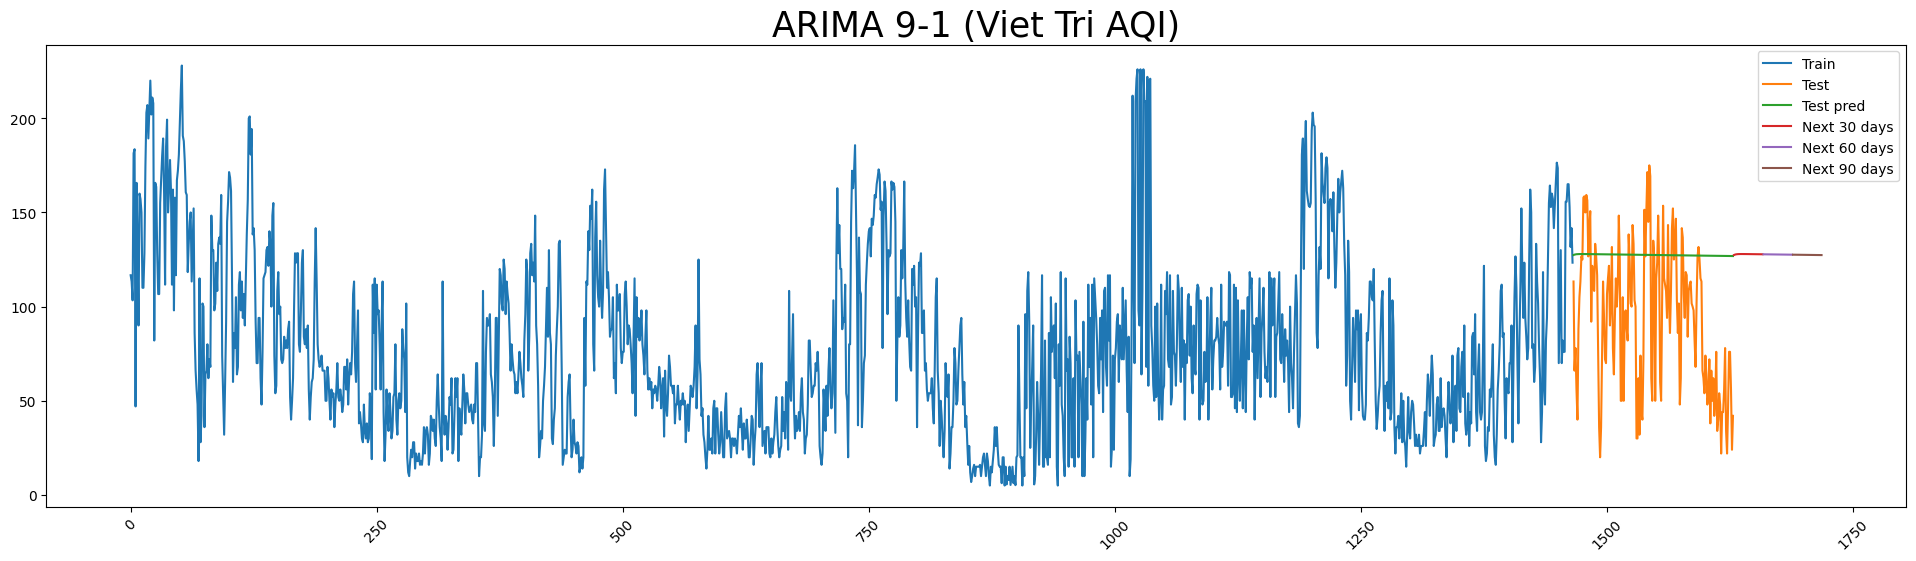

In [92]:
# Lấy giá trị của cột number_days ở dòng cuối cùng
last_number_days = df.index[-1]

# Tạo một Series mới với 30 ngày tiếp theo dựa vào giá trị cuối cùng của cột number_days
next_30_days_data = pd.Series(range(last_number_days + 1, last_number_days + 31))
next_60_days_data = pd.Series(range(last_number_days + 31, last_number_days + 61))
next_90_days_data = pd.Series(range(last_number_days + 61, last_number_days + 91))



plt.figure(figsize=(24, 6))
plt.plot(train_data.index, train_data['AQI'])
plt.plot(test_data.index, test_data['AQI'])


plt.plot(test_data.index, test_pred)
plt.plot(next_30_days_data , next_30days_pred)
plt.plot(next_60_days_data , next_60days_pred)
plt.plot(next_90_days_data , next_90days_pred)

plt.legend(['Train', 'Test', 'Test pred','Next 30 days'  ,'Next 60 days' ,'Next 90 days'])
plt.xticks(rotation=45)
plt.title('ARIMA 9-1 (Viet Tri AQI)', fontsize=25)

plt.show()